# 📊 Notebook 5: Final Reporting & Business Insights
**Project:** E-commerce Customer Churn Automation  
**Author:** [Nama Anda]  
**Date:** 2026-01-07  

### 📋 Ringkasan Proyek
Proyek ini bertujuan untuk mendeteksi pelanggan yang berisiko berhenti menggunakan layanan e-commerce (*churn*). Melalui empat tahap sebelumnya, kita telah berhasil membersihkan data, menganalisis pola perilaku, membangun model *Random Forest* dengan performa tinggi, dan membuat sistem prediksi otomatis.

### 🎯 Tujuan Notebook Ini:
1. Menampilkan ringkasan eksekutif dari hasil prediksi terbaru.
2. Memvisualisasikan faktor kunci pendorong churn untuk kebutuhan presentasi bisnis.
3. Memberikan panduan penggunaan **Interactive Dashboard (Streamlit)**.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Konfigurasi Visualisasi Modern
plt.style.use('ggplot')
sns.set_palette("viridis")
%matplotlib inline

# Mendapatkan path absolut ke folder processed
base_dir = os.path.dirname(os.getcwd())
results_path = os.path.join(base_dir, 'data', 'processed', 'final_predictions.csv')

def load_final_data():
    if os.path.exists(results_path):
        df = pd.read_csv(results_path, sep=';')
        print(f"✅ Berhasil memuat data hasil prediksi: {len(df)} baris.")
        return df
    else:
        print("❌ Error: File 'final_predictions.csv' tidak ditemukan. Harap jalankan 'automation_pipeline.py' terlebih dahulu.")
        return None

df_final = load_final_data()
if df_final is not None:
    display(df_final.head())

✅ Berhasil memuat data hasil prediksi: 3941 baris.


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,Churn_Prediction,Churn_Probability
0,15.0,11.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32.00,0,0,0.13
1,7.0,11.0,4,Mobile,1,Married,2,0,7.0,129.29.00,0,0,0.14
2,8.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54.00,0,0,0.12
3,20.0,11.0,4,Fashion,3,Divorced,7,0,3.0,230.27.00,0,0,0.24
4,8.0,15.0,4,Others,4,Single,8,0,8.0,322.17.00,0,0,0.03


In [4]:
if df_final is not None:
    # Menghitung Metrik Utama
    total_customers = len(df_final)
    predicted_churn = df_final['Churn_Prediction'].sum()
    churn_rate = (predicted_churn / total_customers) * 100
    avg_probability = df_final['Churn_Probability'].mean() * 100

    print("="*40)
    print("      SUMMARY BUSINESS METRICS")
    print("="*40)
    print(f"Total Pelanggan Terproses : {total_customers}")
    print(f"Prediksi Churn Baru       : {predicted_churn} Pelanggan")
    print(f"Estimasi Churn Rate       : {churn_rate:.2f}%")
    print(f"Rata-rata Resiko Churn    : {avg_probability:.2f}%")
    print("="*40)

      SUMMARY BUSINESS METRICS
Total Pelanggan Terproses : 3941
Prediksi Churn Baru       : 315 Pelanggan
Estimasi Churn Rate       : 7.99%
Rata-rata Resiko Churn    : 15.18%


C:\Users\etc\AppData\Local\Temp\ipykernel_2236\2908403805.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='Churn_Prediction', palette='viridis', ax=ax[0])
C:\Users\etc\AppData\Local\Temp\ipykernel_2236\2908403805.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Tetap (0)', 'Churn (1)'])
C:\Users\etc\AppData\Local\Temp\ipykernel_2236\2908403805.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final, x='PreferedOrderCat', y='Churn_Probability', palette='magma', ax=ax[1])


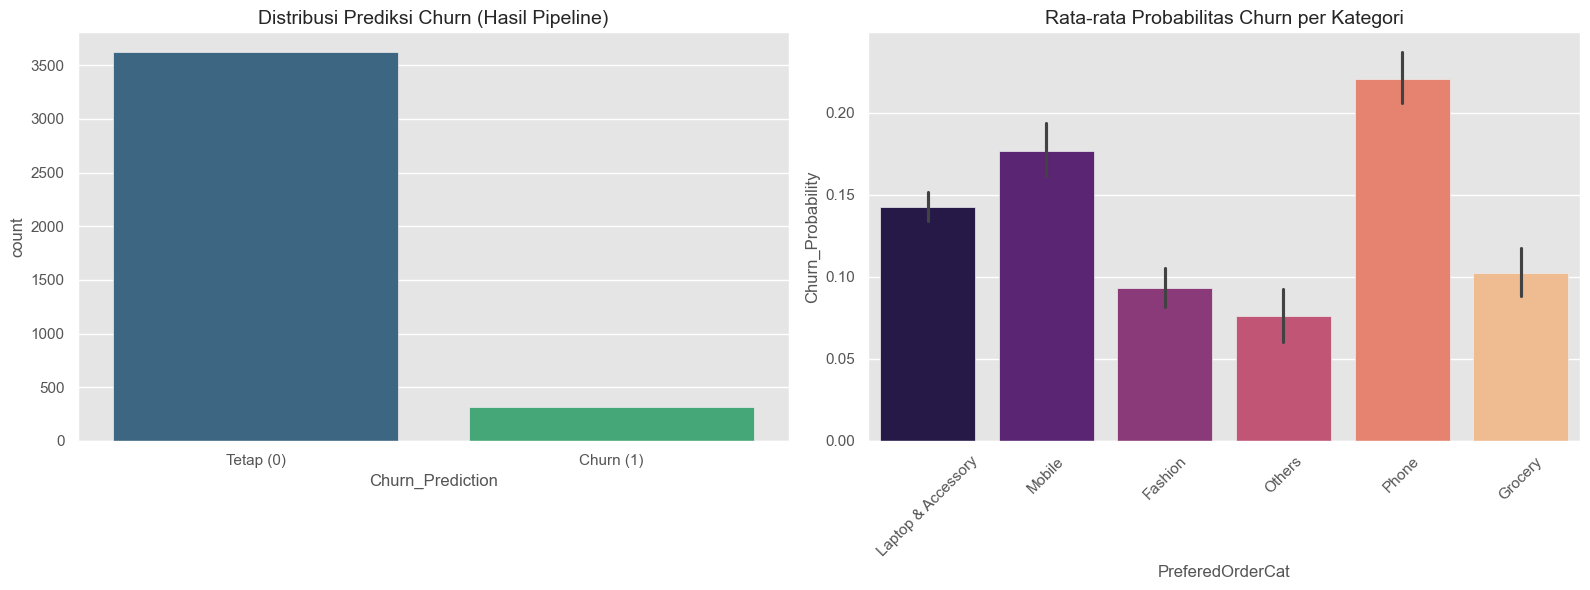

In [6]:
# Membuat 2 grafik utama untuk laporan manajemen
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 1. Distribusi Prediksi Churn
sns.countplot(data=df_final, x='Churn_Prediction', palette='viridis', ax=ax[0])
ax[0].set_title('Distribusi Prediksi Churn (Hasil Pipeline)', fontsize=14)
ax[0].set_xticklabels(['Tetap (0)', 'Churn (1)'])

# 2. Analisis Probabilitas Churn per Kategori Order
sns.barplot(data=df_final, x='PreferedOrderCat', y='Churn_Probability', palette='magma', ax=ax[1])
ax[1].set_title('Rata-rata Probabilitas Churn per Kategori', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 🖥️ Cara Menjalankan Interactive Dashboard
Untuk menampilkan laporan ini dalam bentuk Dashboard modern yang bisa diakses via Browser, ikuti langkah ini:

1. Buka **Terminal** di VS Code.
2. Pastikan Anda berada di folder proyek: `cd src` (atau lokasi file app.py).
3. Jalankan perintah:
   ```bash
   streamlit run dashboard/app.py